# EDA — Linear Regression Architecture Workshop

This notebook demonstrates **three data sources** for housing-related data and performs basic **EDA** (descriptive statistics + plots).

Data sources required:
1. **CSV** (California Housing dataset)
2. **API** (City of Toronto Open Data — example endpoint)
3. **Relational DB** (SQLite — load CSV into DB and query with SQL)

> Folder convention used: `data/raw/` for raw files and `data/processed/` for cleaned/processed files.


In [1]:
# ✅ 0. Setup
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Project paths (notebook is in notebooks/, so go up one level)
PROJECT_ROOT = Path("..").resolve()
RAW_DIR = PROJECT_ROOT / "data" / "raw"
PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"

RAW_DIR.mkdir(parents=True, exist_ok=True)
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

print("PROJECT_ROOT:", PROJECT_ROOT)
print("RAW_DIR:", RAW_DIR)
print("PROCESSED_DIR:", PROCESSED_DIR)


PROJECT_ROOT: /Users/thanmayaanil/Desktop/Python/LinearRegressionArchitecture_Workshop
RAW_DIR: /Users/thanmayaanil/Desktop/Python/LinearRegressionArchitecture_Workshop/data/raw
PROCESSED_DIR: /Users/thanmayaanil/Desktop/Python/LinearRegressionArchitecture_Workshop/data/processed


## 1) CSV Data Source — California Housing (scikit-learn)
We fetch the dataset, save it into `data/raw/`, reload it from CSV, and perform basic EDA.

In [2]:
from sklearn.datasets import fetch_california_housing

# Fetch as DataFrame
california = fetch_california_housing(as_frame=True)
df_ca = california.frame.copy()

# Save raw CSV
ca_csv_path = RAW_DIR / "california.csv"
df_ca.to_csv(ca_csv_path, index=False)

print("Saved:", ca_csv_path)
df_ca.head()


Saved: /Users/thanmayaanil/Desktop/Python/LinearRegressionArchitecture_Workshop/data/raw/california.csv


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 1.1 Descriptive statistics (CSV dataset)

In [3]:
df_ca.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df_ca.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
# Missing values check

df_ca.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### 1.2 Simple plots (CSV dataset)
We plot:
- Distribution of target (MedHouseVal)
- Scatter plot of a feature (MedInc) vs target

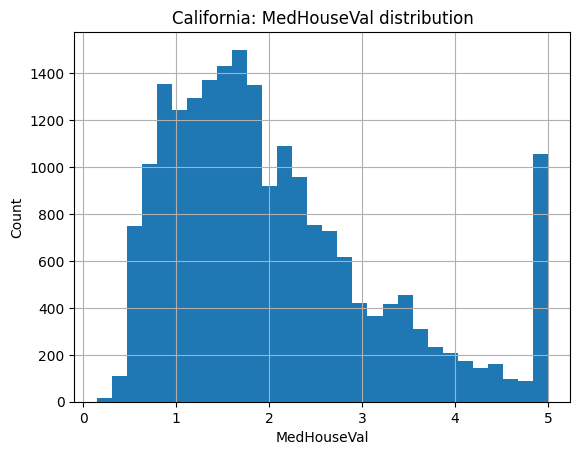

In [6]:
# Histogram of target
plt.figure()
df_ca["MedHouseVal"].hist(bins=30)
plt.title("California: MedHouseVal distribution")
plt.xlabel("MedHouseVal")
plt.ylabel("Count")
plt.show()


In [ ]:
# Scatter: feature vs target
plt.figure()
plt.scatter(df_ca["MedInc"], df_ca["MedHouseVal"], s=10)
plt.title("California: MedInc vs MedHouseVal")
plt.xlabel("MedInc (Median Income)")
plt.ylabel("MedHouseVal (Median House Value)")
plt.show()


### 1.3 Create a processed version (basic cleaning)
We run a standard cleaning step and save to `data/processed/`.

In [7]:
df_ca_clean = df_ca.dropna().copy()

ca_processed_path = PROCESSED_DIR / "california_clean.csv"
df_ca_clean.to_csv(ca_processed_path, index=False)

print("Saved processed:", ca_processed_path)
df_ca_clean.shape


Saved processed: /Users/thanmayaanil/Desktop/Python/LinearRegressionArchitecture_Workshop/data/processed/california_clean.csv


(20640, 9)

## 2) API Data Source — City of Toronto Open Data (Example)
This section demonstrates how to pull data from a public API using `requests`.

⚠️ Notes:
- API endpoints sometimes change.
- If the request fails (network/offline), the notebook will **not crash** and will show a helpful message.
- Replace the endpoint with the dataset your professor recommended if needed.


In [10]:
import json
import requests

# Example Toronto Open Data API endpoint (CKAN package_search)
# Replace with a specific dataset endpoint if your course provided one.
api_url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_search"
api_params = {"q": "housing", "rows": 5}

api_raw_json_path = RAW_DIR / "toronto_api_raw.json"

try:
    r = requests.get(api_url, params=api_params, timeout=30)
    r.raise_for_status()
    api_data = r.json()

    # Save raw JSON
    with open(api_raw_json_path, "w", encoding="utf-8") as f:
        json.dump(api_data, f, indent=2)

    print("API request success ✅")
    print("Saved raw JSON:", api_raw_json_path)

    # Convert results to DataFrame for basic exploration
    results = api_data.get("result", {}).get("results", [])
    df_api = pd.DataFrame(results)
    df_api.head()

except Exception as e:
    print("API request failed ❌")
    print("Reason:", repr(e))
    print("\nTip: If you're offline or the endpoint changed, update api_url/api_params.")
    df_api = pd.DataFrame()


API request success ✅
Saved raw JSON: /Users/thanmayaanil/Desktop/Python/LinearRegressionArchitecture_Workshop/data/raw/toronto_api_raw.json


### 2.1 Basic EDA (API data)
If the API call succeeded, we show descriptive stats on numeric columns and a simple plot (if possible).

In [11]:
if not df_api.empty:
    print("API rows:", len(df_api))
    df_api.info()
    df_api.describe(include="all")
else:
    print("No API dataframe to analyze (API request likely failed).")


API rows: 5
<class 'pandas.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   author                    5 non-null      str   
 1   author_email              5 non-null      str   
 2   civic_issues              3 non-null      object
 3   creator_user_id           5 non-null      str   
 4   dataset_category          5 non-null      str   
 5   date_published            5 non-null      str   
 6   excerpt                   5 non-null      str   
 7   formats                   5 non-null      object
 8   id                        5 non-null      str   
 9   information_url           4 non-null      str   
 10  is_retired                5 non-null      bool  
 11  isopen                    5 non-null      bool  
 12  last_refreshed            5 non-null      str   
 13  license_id                5 non-null      str   
 14  license_title             5 n

Numeric columns: ['num_resources', 'num_tags']


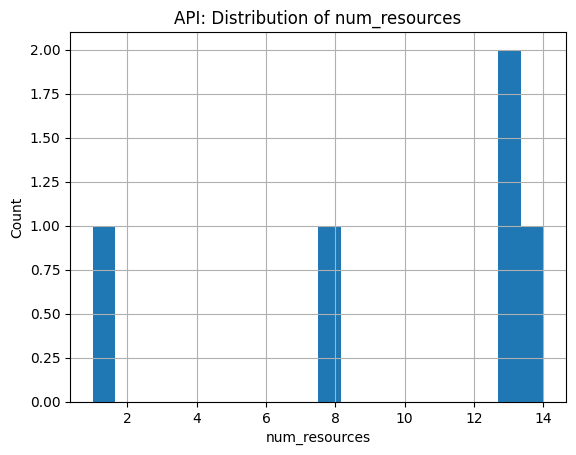

In [12]:
# Optional: plot if a numeric column exists
if not df_api.empty:
    numeric_cols = df_api.select_dtypes(include=[np.number]).columns.tolist()
    print("Numeric columns:", numeric_cols)

    if numeric_cols:
        col = numeric_cols[0]
        plt.figure()
        df_api[col].dropna().hist(bins=20)
        plt.title(f"API: Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()
    else:
        print("No numeric columns to plot in the API sample.")


## 3) Relational Database Source — SQLite
We create a SQLite database file in `data/raw/`, load the **California CSV** into a table, then query it using SQL.

This satisfies the **Relational Database** requirement in a portable way (no external DB server needed).

In [13]:
import sqlite3

sqlite_path = RAW_DIR / "housing.sqlite"
conn = sqlite3.connect(sqlite_path)

# Load the CSV data into SQLite
df_ca_for_db = pd.read_csv(ca_csv_path)

table_name = "california_housing"
df_ca_for_db.to_sql(table_name, conn, if_exists="replace", index=False)

print("SQLite DB created:", sqlite_path)
print("Table loaded:", table_name)


SQLite DB created: /Users/thanmayaanil/Desktop/Python/LinearRegressionArchitecture_Workshop/data/raw/housing.sqlite
Table loaded: california_housing


### 3.1 Run SQL queries

In [15]:
# Example SQL: select only a few columns + filter
query = (
    "SELECT MedInc, AveRooms, MedHouseVal "
    "FROM california_housing "
    "WHERE MedInc IS NOT NULL "
    "LIMIT 10;"
)

df_sql_sample = pd.read_sql_query(query, conn)
df_sql_sample


,MedInc,AveRooms,MedHouseVal
0,8.3252,6.984127,4.526
1,8.3014,6.238137,3.585
2,7.2574,8.288136,3.521
3,5.6431,5.817352,3.413
4,3.8462,6.281853,3.422
5,4.0368,4.761658,2.697
6,3.6591,4.931907,2.992
7,3.1200,4.797527,2.414
8,2.0804,4.294118,2.267
9,3.6912,4.970588,2.611


In [16]:
# Example SQL: simple aggregate
query_stats = (
    "SELECT "
    "COUNT(*) AS n_rows, "
    "AVG(MedInc) AS avg_medinc, "
    "AVG(MedHouseVal) AS avg_houseval, "
    "MIN(MedHouseVal) AS min_houseval, "
    "MAX(MedHouseVal) AS max_houseval "
    "FROM california_housing;"
)

df_sql_stats = pd.read_sql_query(query_stats, conn)
df_sql_stats


,n_rows,avg_medinc,avg_houseval,min_houseval,max_houseval
0,20640,3.870671,2.068558,0.14999,5.00001


### 3.2 Save a DB query result to processed folder

In [17]:
db_extract_path = PROCESSED_DIR / "california_from_sql.csv"
df_sql_sample.to_csv(db_extract_path, index=False)
print("Saved:", db_extract_path)


Saved: /Users/thanmayaanil/Desktop/Python/LinearRegressionArchitecture_Workshop/data/processed/california_from_sql.csv


## 4) Summary
- ✅ CSV source: California Housing saved to `data/raw/california.csv`
- ✅ API source: Example Toronto Open Data API (saves raw JSON to `data/raw/toronto_api_raw.json` when online)
- ✅ DB source: SQLite database `data/raw/housing.sqlite` with SQL queries
- ✅ Basic EDA: `info()`, `describe()`, missing values, and plots

Next notebook (`linear_regression.ipynb`) will pick one feature (e.g., `MedInc`) to predict the target (`MedHouseVal`).
